In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import random
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [2]:

dataIRIS = np.loadtxt('1649181792_01407_1604554690_4994035_1601384279_9602122_iris_new_data.txt', delimiter=' ' )
dataIRIS


array([[5.7, 4.4, 1.5, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.7, 3.8, 6.7, 2.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.8, 1.9, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.5, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 3.4, 5.4, 2.3],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.4, 1.9, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [4.6, 3

In [3]:
lab = np.empty((dataIRIS.shape[0],1))
lab.fill(-1)
dataIRIS = np.append(dataIRIS, lab, axis = 1)
print(dataIRIS)

[[ 5.7  4.4  1.5  0.4 -1. ]
 [ 5.5  4.2  1.4  0.2 -1. ]
 [ 5.2  4.1  1.5  0.1 -1. ]
 [ 5.8  4.   1.2  0.2 -1. ]
 [ 5.4  3.9  1.7  0.4 -1. ]
 [ 5.4  3.9  1.3  0.4 -1. ]
 [ 7.7  3.8  6.7  2.2 -1. ]
 [ 7.9  3.8  6.4  2.  -1. ]
 [ 5.1  3.8  1.9  0.4 -1. ]
 [ 5.7  3.8  1.7  0.3 -1. ]
 [ 5.1  3.8  1.6  0.2 -1. ]
 [ 5.1  3.8  1.5  0.3 -1. ]
 [ 5.1  3.7  1.5  0.4 -1. ]
 [ 5.4  3.7  1.5  0.2 -1. ]
 [ 5.3  3.7  1.5  0.2 -1. ]
 [ 7.2  3.6  6.1  2.5 -1. ]
 [ 5.   3.6  1.4  0.2 -1. ]
 [ 4.6  3.6  1.   0.2 -1. ]
 [ 5.   3.5  1.6  0.6 -1. ]
 [ 5.2  3.5  1.5  0.2 -1. ]
 [ 5.1  3.5  1.4  0.3 -1. ]
 [ 5.1  3.5  1.4  0.2 -1. ]
 [ 5.   3.5  1.3  0.3 -1. ]
 [ 5.5  3.5  1.3  0.2 -1. ]
 [ 6.3  3.4  5.6  2.4 -1. ]
 [ 6.2  3.4  5.4  2.3 -1. ]
 [ 6.   3.4  4.5  1.6 -1. ]
 [ 4.8  3.4  1.9  0.2 -1. ]
 [ 5.4  3.4  1.7  0.2 -1. ]
 [ 5.   3.4  1.6  0.4 -1. ]
 [ 4.8  3.4  1.6  0.2 -1. ]
 [ 5.4  3.4  1.5  0.4 -1. ]
 [ 5.1  3.4  1.5  0.2 -1. ]
 [ 5.   3.4  1.5  0.2 -1. ]
 [ 4.6  3.4  1.4  0.3 -1. ]
 [ 5.2  3.4  1.4  0.

In [4]:
def kplus(data, k):
    n = data.shape[0]
    r = random.randint(0,n-1)
    
    centroids = []
    centroids.append(data[r, 0:-1])
    for i in range(k-1):
        distance = []
        for di in range(0, n):
            dataPoint = data[di, 0:-1]
            maxi = 10000000
        
            for i in range(len(centroids)):
                dis = np.linalg.norm(centroids[i] - dataPoint)
                maxi = min(dis, maxi)
            distance.append(maxi)
        ind = distance.index(max(distance))
        cent = data[ind, 0:-1]
        centroids.append(cent)

    return centroids
    

In [5]:
def KMean(data, k):
    a = kplus(data, k)
    
    for iteration in range(200):
        iters = True
        
        for di in range(0, data.shape[0]):
            dataPoint = data[di,0:-1]
            mini = 1000000
            minDisIndex = -1
            for ci in range(k):
                dis = np.linalg.norm(a[ci] - dataPoint)
                if mini > dis:
                    mini = dis
                    minDisIndex = ci + 1
            data[di,-1] = minDisIndex
        
        for i in range(k):
            b = data[np.where(data[:,-1] == i+1)]
            val = np.mean(b, axis = 0)[:-1]
            
            e = np.absolute(np.sum(((val - a[i])/val) * 100))
            a[i] = val
            if e > 0.0001:
                iters = False
        if iters:
            break
            
    return a, data, iteration

In [6]:
k = 3
X_norm = preprocessing.normalize(dataIRIS)

In [7]:
X_pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None).fit_transform(X_norm)

In [8]:

X_tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_norm)
centroids, data, iteration = KMean(X_tsne, k)
np.savetxt("out.txt", data[:,-1], fmt='%d')



In [9]:
print(X_pca)

[[ 3.20253875e-01 -5.95801027e-02]
 [ 3.33607958e-01 -4.22179685e-02]
 [ 3.23690694e-01 -4.99395344e-02]
 [ 3.45528589e-01  9.10006647e-04]
 [ 2.73465307e-01 -3.64928639e-02]
 [ 3.21006089e-01 -3.28709505e-02]
 [-1.78565492e-01 -3.03606646e-02]
 [-1.49645962e-01 -9.62650909e-03]
 [ 2.42953924e-01 -5.21405791e-02]
 [ 2.73795383e-01  2.28100285e-03]
 [ 2.91070601e-01 -3.52651408e-02]
 [ 2.97940414e-01 -4.13931153e-02]
 [ 2.86917447e-01 -3.80795555e-02]
 [ 2.97700578e-01 -5.25073415e-04]
 [ 2.97899111e-01 -8.08132832e-03]
 [-1.78426035e-01 -5.18299388e-02]
 [ 3.05800964e-01 -2.00775447e-02]
 [ 3.61216608e-01 -5.06936038e-02]
 [ 2.51084980e-01 -4.06824726e-02]
 [ 2.87198572e-01  5.63026653e-03]
 [ 2.94309885e-01 -8.38356265e-03]
 [ 3.00073677e-01 -1.06393202e-03]
 [ 3.07437554e-01 -1.54277965e-02]
 [ 3.11159622e-01  3.00763650e-02]
 [-1.85993307e-01 -8.12223551e-02]
 [-1.72899348e-01 -8.10670573e-02]
 [-8.70345039e-02 -4.94779361e-02]
 [ 2.28536323e-01 -2.00436115e-02]
 [ 2.56785889e-01  2

In [10]:
print(X_tsne)

[[ 25.596828    2.       ]
 [ 25.725279    2.       ]
 [ 25.308924    2.       ]
 [ 26.245234    2.       ]
 [ 23.299095    2.       ]
 [ 25.774982    2.       ]
 [-11.728295    3.       ]
 [-11.410709    3.       ]
 [ 21.912155    2.       ]
 [ 23.279589    2.       ]
 [ 24.20627     2.       ]
 [ 24.541216    2.       ]
 [ 23.867458    2.       ]
 [ 24.398277    2.       ]
 [ 24.309397    2.       ]
 [-10.156888    1.       ]
 [ 24.670345    2.       ]
 [ 26.306303    2.       ]
 [ 22.397657    2.       ]
 [ 23.738262    2.       ]
 [ 24.42735     2.       ]
 [ 24.45661     2.       ]
 [ 25.073456    2.       ]
 [ 24.878973    2.       ]
 [ -9.976436    1.       ]
 [ -9.68566     1.       ]
 [-10.8067465   3.       ]
 [ 21.268496    2.       ]
 [ 21.753511    2.       ]
 [ 22.164543    2.       ]
 [ 22.636528    2.       ]
 [ 23.55713     2.       ]
 [ 23.331873    2.       ]
 [ 23.330402    2.       ]
 [ 23.928164    2.       ]
 [ 24.099798    2.       ]
 [-10.775932    3.       ]
 

In [11]:
s = silhouette_score(data[:,0:-1], data[:,-1])

In [12]:
print(s)

0.69520473


In [54]:
sir = []
k = 21
iterations = []
for i in range(2,k,2):
    centroids, data,iteration = KMean(X_tsne, i)
    iterations.append(iteration)
    s = silhouette_score(data[:,0:-1], data[:,-1])
    sir.append(s)

In [52]:
sir = [i * 10 for i in sir]

In [15]:
di = np.loadtxt('1649182019_5350096_1604556007_243332_1601384482_8387134_image_new_test.txt', delimiter=',' )



In [16]:
print(di.shape[1])

784


In [17]:
dataIN = preprocessing.normalize(di)

In [18]:
dataPca = PCA(n_components=3, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None).fit_transform(dataIN)

In [19]:
dataSVD = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=5, random_state=None, tol=0.0).fit_transform(dataIN)

In [20]:
dataINT = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(dataIN)

In [21]:
print(dataINT)

[[ -6.439729     4.4600296   -4.562066  ]
 [  2.7877295  -12.664636    18.995941  ]
 [  0.88291985   7.5283365  -18.926975  ]
 ...
 [ -4.6909842    5.2776966  -12.631744  ]
 [  3.2275276    3.8545513   -9.764253  ]
 [-10.716976    -0.02379132   1.0914686 ]]


In [22]:
lab = np.empty((dataINT.shape[0],1))
lab.fill(-1)
dataINTN = np.append(dataINT, lab, axis = 1)
print(dataINTN)

[[ -6.43972921   4.4600296   -4.56206608  -1.        ]
 [  2.7877295  -12.66463566  18.99594116  -1.        ]
 [  0.88291985   7.52833652 -18.92697525  -1.        ]
 ...
 [ -4.69098425   5.27769661 -12.63174438  -1.        ]
 [  3.22752762   3.85455132  -9.76425266  -1.        ]
 [-10.71697617  -0.02379132   1.09146857  -1.        ]]


In [24]:
centroid, dat,itera = KMean(dataINTN, 10)

In [25]:
pred = dat[:,-1]
print(dataINTN)

[[ -6.43972921   4.4600296   -4.56206608   1.        ]
 [  2.7877295  -12.66463566  18.99594116   2.        ]
 [  0.88291985   7.52833652 -18.92697525   9.        ]
 ...
 [ -4.69098425   5.27769661 -12.63174438   9.        ]
 [  3.22752762   3.85455132  -9.76425266  10.        ]
 [-10.71697617  -0.02379132   1.09146857   1.        ]]


In [26]:
si = silhouette_score(dataINT,pred)

In [27]:
print(si)

print(pred.shape)

0.4132271
(10000,)


In [28]:
np.savetxt("out1.txt", pred, fmt='%d')

In [35]:
si = []
k = 21
iterations = []
for i in range(2,k,2):
    centroids, data, iteration = KMean(dataINTN, i)
    iterations.append(iteration)
    s = silhouette_score(data[:,0:-1], data[:,-1])
    si.append(s)

In [58]:
si = [i * 10 for i in si]
print(si)

[29.224976204487955, 35.443371124657006, 37.536298077610866, 40.181941454954256, 41.29754572470999, 40.51915031903276, 38.11258593715377, 37.185613749873305, 36.54443911994752, 35.37339984855031]


[29.2249762  35.44337112 37.53629808 40.18194145 41.29754572 40.51915032
 38.11258594 37.18561375 36.54443912 35.37339985]
[ 1  4 19  6  4  5  6  6 10  4]
[0.9290269, 0.7251407, 0.59679466, 0.54546654, 0.557572, 0.58911824, 0.5624724, 0.57305926, 0.5504627, 0.57488704]


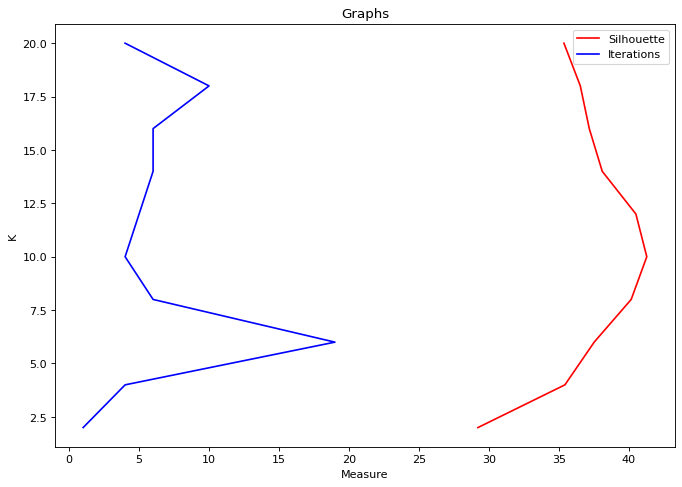

In [59]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline
sira = np.array(si)
print(sira)
itera = np.array(iterations)
print(itera)
ypoints = np.array(list(range(2, 21, 2)))


print(sir)
figure(figsize=(10, 7), dpi=80)
plt.plot( sira, ypoints, color='r', label='Silhouette')
plt.plot( itera, ypoints, color='b', label='Iterations')



plt.xlabel("Measure")
plt.ylabel("K")
plt.title("Graphs")

plt.legend()
  
plt.savefig('testplot.jpg')


plt.show()

